Matplotlib is building the font cache; this may take a moment.


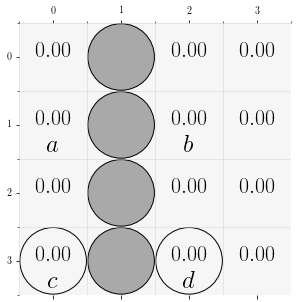

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
from csrl.mdp import GridMDP
import numpy as np 
from copy import deepcopy

shape = n_rows, n_cols = (4,4)

structure = np.array([
['E','B','E','E'],
['E','B','E','E'],
['E','B','E','E'],
['T','B','T','E'],
['E','E','E','E']
])

label = np.empty(shape,dtype=object)
label.fill(())
label[1,0] = ('a',)
label[1,2] = ('b',)
label[3,0] = ('c',)
label[3,2] = ('d',)

label1 = np.empty(shape,dtype=object)
label1.fill(())
# label1[1,0] = ('a',)
label1[1,2] = ('b',)
# label1[3,0] = ('c',)
label1[3,2] = ('d',)

label2 = np.empty(shape,dtype=object)
label2.fill(())
label2[1,0] = ('a',)
# label1[1,2] = ('b',)
label2[3,0] = ('c',)
# label1[3,2] = ('d',)

    
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,figsize=5, p=0.8)
grid_mdp.plot()

In [2]:
from csrl.oa import OmegaAutomaton

# LTL Specification
ltl = '((Fa & !c) U (a & b)) & ((Fb & !d) U (a&b)) & (FG c) & (FG d)'
ltl1 = '((Fa & !c) U (b)) & (FG c) & ((Fb & !d) U (a)) & (FG d) '
ltl2 = '((Fb & !d) U (a)) & (FG d)' 
# (!d U b) & F(b & a) & F(b U a) & (FG d)
#  '((Fa & !c) U (a&b))& ((Fb & !d) U (a&b)) & (FG c) & (FG d)'
# '((!c & !d) U F(a & b)) & (FG c) & (FG d)'

# Translate the LTL formula to an LDBA
oa1 = OmegaAutomaton(ltl, extra_aps=grid_mdp.all_labels)

print('Number of Omega-automaton states (including the trap state):',oa1.shape[1])
display(oa1)

['State: 0', '[0 & !1 & !2 & !3 | !0 & !1 & !3] 0', '[0 & 2] 1', 'State: 1', '[t] 1', '2', 'State: 2', '[1 & 3] 2 {0}']
[0 & !1 & !2 & !3 | !0 & !1 & !3] 0
[None]
{'a'}
---  () -  False -  {'b', 'd', 'c'}  -  {'c', 'd', 'b'}
---  ('a',) -  True -  {'b', 'd', 'c'}  -  {'c', 'd', 'b'}
here 0 [None]
---  ('b',) -  False -  {'b', 'd', 'c'}  -  {'d', 'c'}
---  ('c',) -  False -  {'b', 'd', 'c'}  -  {'d', 'b'}
---  ('d',) -  False -  {'b', 'd', 'c'}  -  {'c', 'b'}
---  ('a', 'b') -  True -  {'b', 'd', 'c'}  -  {'d', 'c'}
---  ('a', 'c') -  True -  {'b', 'd', 'c'}  -  {'d', 'b'}
---  ('a', 'd') -  True -  {'b', 'd', 'c'}  -  {'c', 'b'}
---  ('b', 'c') -  False -  {'b', 'd', 'c'}  -  {'d'}
---  ('b', 'd') -  False -  {'b', 'd', 'c'}  -  {'c'}
---  ('c', 'd') -  False -  {'b', 'd', 'c'}  -  {'b'}
---  ('a', 'b', 'c') -  True -  {'b', 'd', 'c'}  -  {'d'}
---  ('a', 'b', 'd') -  True -  {'b', 'd', 'c'}  -  {'c'}
---  ('a', 'c', 'd') -  True -  {'b', 'd', 'c'}  -  {'b'}
---  ('b', 'c', 'd') -  Fal

In [31]:
oa1.acc

[{(): [None],
  ('a',): [None],
  ('b',): [None],
  ('c',): [None],
  ('d',): [None],
  ('a', 'b'): [None],
  ('a', 'c'): [None],
  ('a', 'd'): [None],
  ('b', 'c'): [None],
  ('b', 'd'): [None],
  ('c', 'd'): [None],
  ('a', 'b', 'c'): [None],
  ('a', 'b', 'd'): [None],
  ('a', 'c', 'd'): [None],
  ('b', 'c', 'd'): [None],
  ('a', 'b', 'c', 'd'): [None]},
 {(): [None],
  ('a',): [None],
  ('b',): [None],
  ('c',): [None],
  ('d',): [None],
  ('a', 'b'): [None],
  ('a', 'c'): [None],
  ('a', 'd'): [None],
  ('b', 'c'): [None],
  ('b', 'd'): [None],
  ('c', 'd'): [None],
  ('a', 'b', 'c'): [None],
  ('a', 'b', 'd'): [None],
  ('a', 'c', 'd'): [None],
  ('b', 'c', 'd'): [None],
  ('a', 'b', 'c', 'd'): [None]},
 {(): [None],
  ('a',): [None],
  ('b',): [None],
  ('c',): [None],
  ('d',): [None],
  ('a', 'b'): [None],
  ('a', 'c'): [None],
  ('a', 'd'): [None],
  ('b', 'c'): [None],
  ('b', 'd'): [None],
  ('c', 'd'): [None],
  ('a', 'b', 'c'): [None],
  ('a', 'b', 'd'): [None],
  ('a', 'c

In [86]:
ltltest = '((Fa & !c) U (a&b))& ((Fb & !d) U (a&b)) & (FG c) & (FG d)'
oa2 =OmegaAutomaton(ltltest, extra_aps=grid_mdp.all_labels)
display(oa2)

['State: 0', '[0 & !1 & !2 & !3 | !0 & !1 & !3] 0', '[0 & 2] 1', 'State: 1', '[t] 1', '2', 'State: 2', '[1 & 3] 2 {0}']
[0 & !1 & !2 & !3 | !0 & !1 & !3] 0
[None]
{'a'}
---  () -  False -  {'b', 'd', 'c'}  -  {'b', 'd', 'c'}
---  ('a',) -  True -  {'b', 'd', 'c'}  -  {'b', 'd', 'c'}
here 0 [None]
---  ('b',) -  False -  {'b', 'd', 'c'}  -  {'d', 'c'}
---  ('c',) -  False -  {'b', 'd', 'c'}  -  {'b', 'd'}
---  ('d',) -  False -  {'b', 'd', 'c'}  -  {'b', 'c'}
---  ('a', 'b') -  True -  {'b', 'd', 'c'}  -  {'d', 'c'}
---  ('a', 'c') -  True -  {'b', 'd', 'c'}  -  {'b', 'd'}
---  ('a', 'd') -  True -  {'b', 'd', 'c'}  -  {'b', 'c'}
---  ('b', 'c') -  False -  {'b', 'd', 'c'}  -  {'d'}
---  ('b', 'd') -  False -  {'b', 'd', 'c'}  -  {'c'}
---  ('c', 'd') -  False -  {'b', 'd', 'c'}  -  {'b'}
---  ('a', 'b', 'c') -  True -  {'b', 'd', 'c'}  -  {'d'}
---  ('a', 'b', 'd') -  True -  {'b', 'd', 'c'}  -  {'c'}
---  ('a', 'c', 'd') -  True -  {'b', 'd', 'c'}  -  {'b'}
---  ('b', 'c', 'd') -  Fal

In [87]:
oa2.delta

[{(): 0,
  ('a',): 0,
  ('b',): 0,
  ('c',): 3,
  ('d',): 3,
  ('a', 'b'): 1,
  ('a', 'c'): 3,
  ('a', 'd'): 3,
  ('b', 'c'): 3,
  ('b', 'd'): 3,
  ('c', 'd'): 3,
  ('a', 'b', 'c'): 1,
  ('a', 'b', 'd'): 1,
  ('a', 'c', 'd'): 3,
  ('b', 'c', 'd'): 3,
  ('a', 'b', 'c', 'd'): 1},
 {(): 1,
  ('a',): 1,
  ('b',): 1,
  ('c',): 1,
  ('d',): 1,
  ('a', 'b'): 1,
  ('a', 'c'): 1,
  ('a', 'd'): 1,
  ('b', 'c'): 1,
  ('b', 'd'): 1,
  ('c', 'd'): 1,
  ('a', 'b', 'c'): 1,
  ('a', 'b', 'd'): 1,
  ('a', 'c', 'd'): 1,
  ('b', 'c', 'd'): 1,
  ('a', 'b', 'c', 'd'): 1},
 {(): 3,
  ('a',): 3,
  ('b',): 3,
  ('c',): 3,
  ('d',): 3,
  ('a', 'b'): 3,
  ('a', 'c'): 3,
  ('a', 'd'): 3,
  ('b', 'c'): 3,
  ('b', 'd'): 3,
  ('c', 'd'): 2,
  ('a', 'b', 'c'): 3,
  ('a', 'b', 'd'): 3,
  ('a', 'c', 'd'): 2,
  ('b', 'c', 'd'): 2,
  ('a', 'b', 'c', 'd'): 2},
 {(): 3,
  ('a',): 3,
  ('b',): 3,
  ('c',): 3,
  ('d',): 3,
  ('a', 'b'): 3,
  ('a', 'c'): 3,
  ('a', 'd'): 3,
  ('b', 'c'): 3,
  ('b', 'd'): 3,
  ('c', 'd'): 3,


In [33]:
oa1.shape

(1, 6)

In [7]:
display(oa1)

In [160]:
from csrl import ControlSynthesis
import numpy as np 

# Construct product MDPs
csrl1 = ControlSynthesis(grid_mdp,oa1)

csrl2 = ControlSynthesis(grid_mdp,oa1) 

In [89]:
csrl1.A[0][1]

array([[list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
        list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])],
       [list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
        list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])],
       [list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
        list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])],
       [list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
        list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])]], dtype=object)

In [161]:
from multi import MultiControlSynthesis

mcsrl = MultiControlSynthesis([csrl1, csrl2], oa = oa1, starts=[(0, 0), (0, 3)], mdp=grid_mdp, sharedoa=True)
mcsrl.shape

(2, 1, 4, 4, 4, 8)

In [53]:
oa1.shape

(1, 4)

In [92]:
csrl1.transition_probs[0,3,0,0]

array([([(0, 3, 0, 0)], [1.0]),
       ([(0, 3, 1, 0), (0, 3, 0, 0)], [0.8, 0.19999999999999996]),
       ([(0, 3, 1, 0), (0, 3, 0, 0)], [0.09999999999999998, 0.9]),
       ([(0, 3, 1, 0), (0, 3, 0, 0)], [0.09999999999999998, 0.9]), None,
       None, None, None], dtype=object)

In [111]:
Q_shared = mcsrl.combined_qlearning_sharedstate(T=100, K=1000)

(2, 1, 4, 4, 4, 4, 4, 8)
------------ episode 0
------------ episode 1
------------ episode 2
------------ episode 3
------------ episode 4
------------ episode 5
------------ episode 6
------------ episode 7
------------ episode 8
------------ episode 9
------------ episode 10
------------ episode 11
------------ episode 12
------------ episode 13
------------ episode 14
------------ episode 15
------------ episode 16
------------ episode 17
------------ episode 18
------------ episode 19
------------ episode 20
------------ episode 21
------------ episode 22
------------ episode 23
------------ episode 24
------------ episode 25
------------ episode 26
------------ episode 27
------------ episode 28
------------ episode 29
------------ episode 30
------------ episode 31
------------ episode 32
------------ episode 33
------------ episode 34
------------ episode 35
------------ episode 36
------------ episode 37
------------ episode 38
------------ episode 39
------------ episode 40
-

In [113]:
policies = [np.argmax(Q_shared[0],axis=6), np.argmax(Q_shared[1],axis=6)]
values = [np.max(Q_shared[0],axis=6), np.max(Q_shared[1],axis=6)]

In [144]:
policies[0].shape

(1, 4, 4, 4, 4, 4)

In [145]:
policies[0][0][0][3][0][0]

array([0, 0, 0, 0])

In [146]:
mcsrl.simulate_shared(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedstateoa")

20
e [(0, 0, 0, 0, 0, 0, 0, 3)]
(0, 0, 0, 0, 0, 0, 0, 3)
0 :   oa_state: (0, 0, 0, 0)  state : (0, 0, 0, 3)
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 0 0 0]]
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
[[0 0 3 1]
 [0 0 2 2]
 [0 0 0 2]
 [0 

[(0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3),
 (0, 0, 0, 0, 0, 0, 0, 3)]

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

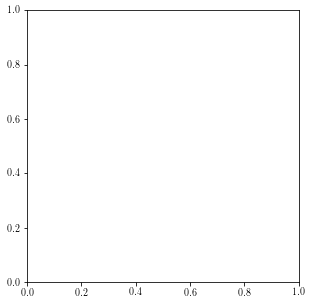

In [114]:
display(oa1)
mcsrl.plot(0, value=values[0], policy=policies[0])

In [115]:
ep = mcsrl.simulate(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedstateoa")

20
e [[(0, 0, 0, 0), (0, 0, 0, 3)]]


ValueError: too many values to unpack (expected 2)

In [74]:
mcsrl.reward[0][2][3][0][3][2]

0.020000000000000018

In [75]:
mcsrl.reward[0][2][3][2][3][0]

0.020000000000000018

In [8]:
grid_mdp.all_labels

[('a',), ('b',), ('c',), ('d',)]

In [43]:
mcsrl.reward[0][5]

array([[[[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]]],


       [[[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

        [[0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ],
         [0.  , 0.  , 0.  , 0.  ]],

    

### not shared state -> shared oa -> works but high number of episodes required. -> episodes > 30k 

In [182]:
qval = mcsrl.combined_qlearning(T=50, K=50000)

In [183]:
policies = [np.argmax(qval[0],axis=4), np.argmax(qval[1],axis=4)]
values = [np.max(qval[0],axis=4), np.max(qval[1],axis=4)]

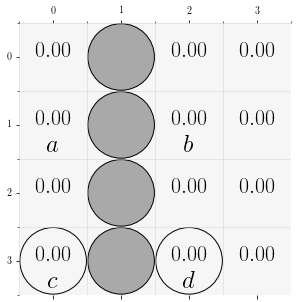

In [184]:
grid_mdp.plot()

In [185]:
#ltl1 = '(!a U b) & F d & FG c'
display(oa1)
mcsrl.plot(0, policies[0], values[0])

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

In [186]:
mcsrl.plot(1, policies[1], values[1])

interactive(children=(IntSlider(value=0, description='i', max=0), IntSlider(value=0, description='q', max=3), …

In [157]:
policies[0].shape

(1, 4, 4, 4)

In [187]:
ep = mcsrl.simulate(agents = mcsrl.agent_control, policy =policies, T= 20, mdp2 =grid_mdp, animation="sharedoa2")

20
e [[(0, 0, 0, 0), (0, 0, 0, 3)]]
0 :  (0, 0, 0) 	 (0, 0, 3)
1 :  (0, 1, 0) 	 (0, 1, 3)
2 :  (1, 1, 0) 	 (1, 1, 2)
3 :  (1, 2, 0) 	 (1, 1, 3)
4 :  (1, 2, 0) 	 (1, 1, 2)
5 :  (1, 2, 0) 	 (1, 2, 2)
6 :  (1, 2, 0) 	 (1, 3, 2)
7 :  (1, 2, 0) 	 (1, 3, 2)
8 :  (1, 2, 0) 	 (1, 3, 2)
9 :  (1, 3, 0) 	 (1, 3, 2)
10 :  (2, 3, 0) 	 (1, 3, 2)
11 :  (3, 3, 0) 	 (1, 3, 2)
12 :  (3, 3, 0) 	 (1, 3, 2)
13 :  (3, 3, 0) 	 (1, 3, 2)
14 :  (3, 3, 0) 	 (1, 3, 2)
15 :  (3, 3, 0) 	 (1, 3, 2)
16 :  (3, 3, 0) 	 (1, 3, 2)
17 :  (3, 3, 0) 	 (1, 3, 2)
18 :  (3, 3, 0) 	 (1, 3, 2)
19 :  (3, 3, 0) 	 (1, 3, 2)


In [170]:
pol = np.argmax(qval[1],axis=4)
pol [0][0]

array([[0, 0, 3, 3],
       [0, 0, 2, 0],
       [0, 0, 0, 3],
       [0, 0, 0, 0]])

In [90]:
oa1.eps

[[], [2], [], []]

array([[[[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])]],

        [[list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
          list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])],
         [list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
          list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])],
         [list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
          list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])],
         [list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6]),
          list([0, 1, 2, 3, 6]), list([0, 1, 2, 3, 6])]],

        [[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
          list([0, 1, 2, 3])],
         [list([0, 1, 2, 3]), list([0, 

In [88]:
print((mcsrl.Q[1][0]))

[[[[0.         0.         0.         0.         0.         0.
    0.         0.        ]
   [0.         0.         0.         0.         0.         0.
    0.         0.        ]
   [0.00782956 0.00782906 0.007829   0.00782912 0.         0.
    0.         0.        ]
   [0.00783695 0.00783694 0.00783694 0.00783693 0.         0.
    0.         0.        ]]

  [[0.         0.         0.         0.         0.         0.
    0.         0.        ]
   [0.         0.         0.         0.         0.         0.
    0.         0.        ]
   [0.00793691 0.00793678 0.007937   0.00793651 0.         0.
    0.         0.        ]
   [0.00783341 0.00783319 0.00783342 0.00783285 0.         0.
    0.         0.        ]]

  [[0.         0.         0.         0.         0.         0.
    0.         0.        ]
   [0.         0.         0.         0.         0.         0.
    0.         0.        ]
   [0.00771174 0.00357202 0.0052338  0.00335323 0.         0.
    0.         0.        ]
   [0.00508919 0.

In [116]:
p = np.max(qval[1], axis=4)
print(qval[1][0][3][3])

[[  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [  0.           0.           0.           0.           0.
    0.           0.           0.           0.           0.        ]
 [126.87881441 126.87881498 126.87881509 126.87881467   0.
    0.           0.           0.          33.21196389   0.        ]
 [126.87884028 126.87884155 126.87884157 126.8788405    0.
    0.           0.           0.           0.           0.        ]]


In [83]:
csrl2.A[0][3]

array([[list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
        list([0, 1, 2, 3])],
       [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
        list([0, 1, 2, 3])],
       [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
        list([0, 1, 2, 3])],
       [list([0, 1, 2, 3]), list([0, 1, 2, 3]), list([0, 1, 2, 3]),
        list([0, 1, 2, 3])]], dtype=object)

In [84]:
csrl2.reward

array([[[[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]],

        [[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]]])